<a href="https://colab.research.google.com/github/abinashgochhayat1998/BasicMachineLearningAlgorithms/blob/main/M200674CA_LogisticReggression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all the required packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

##load our data set from computer 
import io
from google.colab import files
uploaded = files.upload()

Saving dermatology.csv to dermatology.csv


In [ ]:
dataframe = pd.read_csv(io.BytesIO(uploaded['dermatology.csv']))
dataframe.head(20) 

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3
5,2,3,2,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,41.0,2
6,2,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,18.0,5
7,2,2,3,3,3,3,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,0,2,2,3,2,0,0,3,3,57.0,3
8,2,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,22.0,4
9,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,30.0,4


In [ ]:
dataframe.shape

(366, 35)

In [ ]:
dataframe.isnull().sum()#in our data set we have any missing values so we have to replace missing values with mode age

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [ ]:
df=dataframe['age'].fillna(dataframe['age'].mode()[0])
dataframe['age']=df
dataframe.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [ ]:
Normalised_Data=dataframe.iloc[:,:-1]
Normalised_Data=Normalised_Data.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))
dataframe.iloc[:,:-1]=Normalised_Data
dataframe.head(10)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,0.666667,0.666667,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.333333,0.0,0.733333,2
1,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,0.0,0.000000,0.333333,0.333333,1.0,0.000000,0.0,0.333333,0.0,0.333333,0.666667,0.0,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.106667,1
2,0.666667,0.333333,0.666667,1.000000,0.333333,1.000000,0.0,1.000000,0.000000,0.000000,0.0,0.333333,0.0,0.000000,0.0,0.333333,0.666667,0.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.666667,1.000000,0.666667,0.0,0.0,0.666667,1.0,0.346667,3
3,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.666667,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.666667,0.0,1.000000,0.666667,0.666667,0.666667,0.666667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.533333,1
4,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.0,0.666667,0.000000,0.000000,0.0,0.333333,0.0,0.000000,0.0,0.333333,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.666667,1.000000,0.666667,1.000000,0.0,0.0,0.666667,1.0,0.600000,3
5,0.666667,1.000000,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.333333,0.0,0.666667,0.666667,0.0,0.666667,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.0,0.0,0.333333,0.0,0.546667,2
6,0.666667,0.333333,0.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.333333,1.000000,0.0,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.666667,0.0,0.240000,5
7,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,0.0,0.666667,0.000000,0.000000,0.0,0.666667,0.0,0.000000,0.0,0.666667,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.666667,1.000000,0.666667,0.0,0.0,1.000000,1.0,0.760000,3
8,0.666667,0.666667,0.333333,0.000000,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.666667,0.333333,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.0,0.0,0.666667,0.0,0.293333,4
9,0.666667,0.666667,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.666667,0.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.0,0.0,0.666667,0.0,0.400000,4


In [ ]:
Dataset0 = dataframe.copy();Dataset1 = dataframe.copy();Dataset2 = dataframe.copy();Dataset3 = dataframe.copy();Dataset4 = dataframe.copy();Dataset5 = dataframe.copy();
datasets = [Dataset0,Dataset1,Dataset2,Dataset3,Dataset4,Dataset5]

In [ ]:
#this cell creates individual binary datasets
label = 'class'
for i in range(6):
  for j in range(366):
    if datasets[i].at[j,label] == i+1:
      datasets[i].at[j,label] = 1
    else:
      datasets[i].at[j,label] = 0

In [ ]:
Dataset0.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,0.666667,0.666667,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.333333,0.0,0.733333,0
1,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,0.0,0.000000,0.333333,0.333333,1.0,0.000000,0.0,0.333333,0.0,0.333333,0.666667,0.0,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.106667,1
2,0.666667,0.333333,0.666667,1.000000,0.333333,1.000000,0.0,1.000000,0.000000,0.000000,0.0,0.333333,0.0,0.000000,0.0,0.333333,0.666667,0.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.666667,1.000000,0.666667,0.0,0.0,0.666667,1.0,0.346667,0
3,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.666667,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.666667,0.0,1.000000,0.666667,0.666667,0.666667,0.666667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.533333,1
4,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.0,0.666667,0.000000,0.000000,0.0,0.333333,0.0,0.000000,0.0,0.333333,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.666667,1.000000,0.666667,1.000000,0.0,0.0,0.666667,1.0,0.600000,0


In [ ]:
#TrainTest_datadict['key'][0] ==> X && TrainTest_datadict['key'][1] ==> y
TrainTest_datadict = {}  
for i in range(6):
  X = datasets[i].iloc[:,:-1]
  print(X.shape)
  X = X.T
  y = datasets[i].iloc[:,-1]
  print(y.shape)
  y = np.array([y])
  TrainTest_datadict['D'+str(i)] = [X,y]  

(366, 34)
(366,)
(366, 34)
(366,)
(366, 34)
(366,)
(366, 34)
(366,)
(366, 34)
(366,)
(366, 34)
(366,)


In [ ]:
itterations = 10000000   #random big value 
learning_rate = 0.160 
size = 366
cost_values = []
trained_parameters = []
for trainsets in range(6):
  X = TrainTest_datadict['D'+str(trainsets)][0] 
  y = TrainTest_datadict['D'+str(trainsets)][1]
  slope = np.random.randn(1,34)
  bias = 0 
  costfunc_values = []
  k = 0
  print('Training for dataset '+str(trainsets))
  for i in range(1,itterations+1):
    #logistic function
    z = np.dot(slope,X) + bias 
    hypothesis = 1/(1 + np.exp(-z)) 

    #cost function
    j = 1/size*(-1*(np.sum(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis))))
    costfunc_values.append(j)
    k+=1

    #gradient decent
    dw =  1/size * np.dot(hypothesis-y,X.T)
    db =  1/size * np.sum(hypothesis-y)
    slope = slope - learning_rate*dw
    bias = bias - learning_rate*db

    #stop training
    if i%5000 == 0:
      print('running at iteration number ',j)
    if i%2 == 0:
      if abs(j-costfunc_values[-2])<0.000001:
        if abs(j-costfunc_values[-3])<0.000001:
          break 
  cost_values.append(costfunc_values)  
  trained_parameters.append([slope,bias])      
  print('itteration number:',k)

Training for dataset 0
running at iteration number  0.007181691704882392
itteration number: 8008
Training for dataset 1
running at iteration number  0.058066897014504716
running at iteration number  0.04466025148980989
running at iteration number  0.038380014635679735
running at iteration number  0.03435259174043489
running at iteration number  0.03140998788114735
itteration number: 25636
Training for dataset 2
itteration number: 4888
Training for dataset 3
running at iteration number  0.05248991285712062
running at iteration number  0.04004457186576298
running at iteration number  0.034155570515836405
running at iteration number  0.030393692095162673
itteration number: 23932
Training for dataset 4
running at iteration number  0.009573500145369352
itteration number: 9426
Training for dataset 5
running at iteration number  0.004579593749043231
itteration number: 6358


In [ ]:
totalpred=0
for datasetnum in range(6):
  X = TrainTest_datadict['D'+str(datasetnum)][0]
  y = TrainTest_datadict['D'+str(datasetnum)][1]
  weights = trained_parameters[datasetnum][0]
  bias = trained_parameters[datasetnum][1]
  correct_predictions = 0 
  for i in range(366):
    z = np.dot(weights,X.T.iloc[i,:])+bias
    hypothesis = 1/(1 + np.exp(-z))
    if np.logical_and(hypothesis >= 0.5,y.T[i,0] == 1):
        correct_predictions+=1
    if np.logical_and(hypothesis < 0.5,y.T[i,0] == 0):
        correct_predictions+=1    
  #print(correct_predictions)  
  totalpred+=correct_predictions   
  print(totalpred) 
  acc = (correct_predictions/366)*100
  print('accuracy for dataset '+str(datasetnum)," = ",acc)

366
accuracy for dataset 0  =  100.0
728
accuracy for dataset 1  =  98.90710382513662
1094
accuracy for dataset 2  =  100.0
1457
accuracy for dataset 3  =  99.18032786885246
1823
accuracy for dataset 4  =  100.0
2189
accuracy for dataset 5  =  100.0


In [ ]:
print('Total accuracy for dataset ',(totalpred/(366*6))*100)

Total accuracy for dataset  99.68123861566485


In [ ]:
TTP=0;TTN=0;TFN=0;TFP=0;
for datasetnum in range(6):
  X = TrainTest_datadict['D'+str(datasetnum)][0]
  y = TrainTest_datadict['D'+str(datasetnum)][1]
  slope = trained_parameters[datasetnum][0]
  bias = trained_parameters[datasetnum][1]
  correct_predictions = 0 
  TP=0
  TN=0
  FN=0
  FP=0
  for i in range(366):
    z = np.dot(slope,X.T.iloc[i,:])+bias
    hypothesis = 1/(1 + np.exp(-z))
    if np.logical_and(hypothesis >= 0.5,y.T[i,0] == 1):
        TP+=1
    elif np.logical_and(hypothesis < 0.5,y.T[i,0] == 0):
        TN+=1   
    elif np.logical_and(hypothesis >= 0.5,y.T[i,0] == 0):
        FP+=1
    elif np.logical_and(hypothesis < 0.5,y.T[i,0] == 1):
        FN+=1   
  TTP+=TP;TTN+=TN;TFN+=FN;TFP+=FP;  
  precision = (TP/(TP+FP))
  recall=TP/(TP+FN)
  print('Precision '+str(datasetnum)," = ",precision)
  print('Recall '+str(datasetnum)," = ",recall)
  

Precision 0  =  1.0
Recall 0  =  1.0
Precision 1  =  0.9830508474576272
Recall 1  =  0.9508196721311475
Precision 2  =  1.0
Recall 2  =  1.0
Precision 3  =  0.9791666666666666
Recall 3  =  0.9591836734693877
Precision 4  =  1.0
Recall 4  =  1.0
Precision 5  =  1.0
Recall 5  =  1.0


In [ ]:
Total_precision=TTP/(TTP+TFP)
Total_Recall=TTP/(TTP+TFN)
print('Overall Precision of our model =',Total_precision)
print('Overall Recall of our model =',Total_Recall)
f1score=(2*Total_precision*Total_Recall)/(Total_precision+Total_Recall)
print('F1 score of our model =',f1score)

Overall Precision of our model = 0.9944903581267218
Overall Recall of our model = 0.9863387978142076
F1 score of our model = 0.9903978052126201


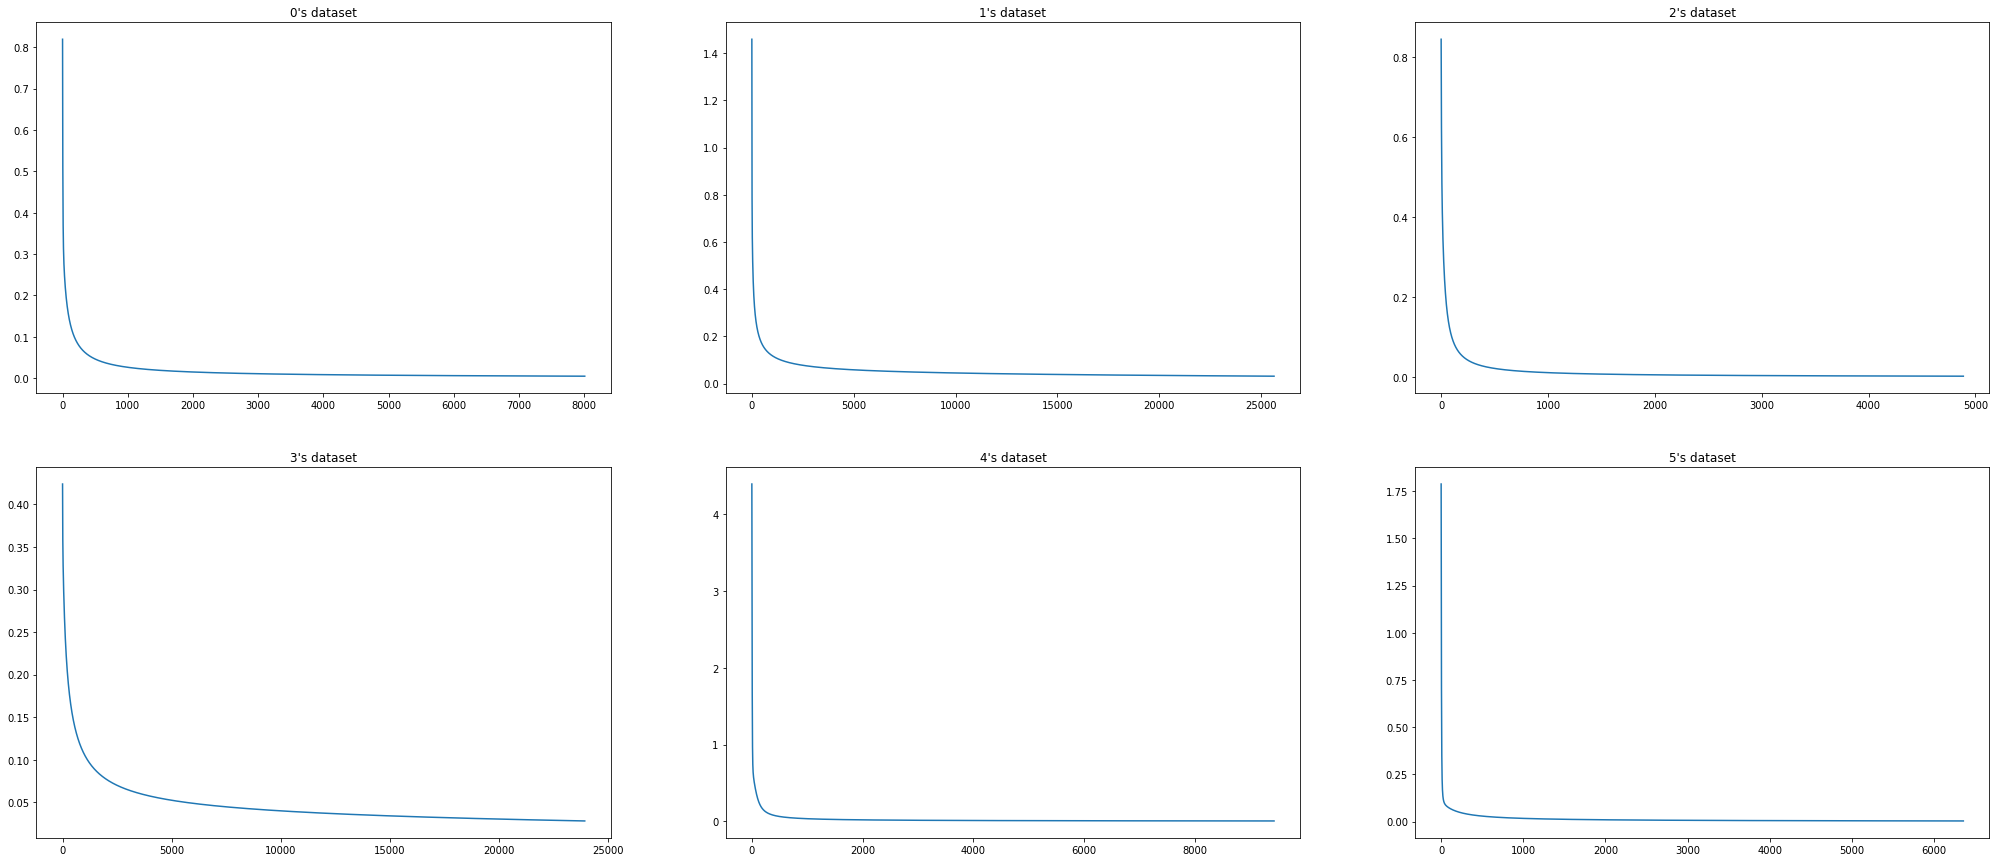

In [ ]:
fig,a =  plt.subplots(2,3,figsize=(35,15))
a[0][0].plot(cost_values[0])
a[0][0].set_title("0's dataset")
a[0][1].plot(cost_values[1])
a[0][1].set_title("1's dataset")
a[0][2].plot(cost_values[2])
a[0][2].set_title("2's dataset")
a[1][0].plot(cost_values[3])
a[1][0].set_title("3's dataset")
a[1][1].plot(cost_values[4])
a[1][1].set_title("4's dataset")
a[1][2].plot(cost_values[5])
a[1][2].set_title("5's dataset")
plt.show()